In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
x = student_performance.data.features
y = student_performance.data.targets
df=pd.concat([x,y],axis=1)
# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)

# Display the head of the features and targets DataFrames
print("Features (X) head:")
print(x.head())
print("\nTargets (y) head:")
print(y.head())
print("\ndatagrame head:")
print(df.head())

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

**checking for missing value**

it seems like their is no nulss in this data set

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
for c in df.columns:
  print(f"unique values in {c} are")
  print(df[c].unique())
  print("_"*50)

unique values in school are
['GP' 'MS']
__________________________________________________
unique values in sex are
['F' 'M']
__________________________________________________
unique values in age are
[18 17 15 16 19 22 20 21]
__________________________________________________
unique values in address are
['U' 'R']
__________________________________________________
unique values in famsize are
['GT3' 'LE3']
__________________________________________________
unique values in Pstatus are
['A' 'T']
__________________________________________________
unique values in Medu are
[4 1 3 2 0]
__________________________________________________
unique values in Fedu are
[4 1 2 3 0]
__________________________________________________
unique values in Mjob are
['at_home' 'health' 'other' 'services' 'teacher']
__________________________________________________
unique values in Fjob are
['teacher' 'other' 'services' 'health' 'at_home']
__________________________________________________
unique values i

In [5]:
df_encoded=pd.get_dummies(df,drop_first=True ,columns=["school","sex","address","famsize","Pstatus","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"])
df_encoded.head()

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,...,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,at_home,teacher,course,mother,2,2,0,...,False,False,True,False,False,False,True,True,False,False
1,17,1,1,at_home,other,course,father,1,2,0,...,False,True,False,True,False,False,False,True,True,False
2,15,1,1,at_home,other,other,mother,1,2,0,...,True,True,True,False,False,False,True,True,True,False
3,15,4,2,health,services,home,mother,1,3,0,...,False,True,False,True,False,True,True,True,True,True
4,16,3,3,other,other,home,father,1,2,0,...,False,True,False,True,False,False,True,True,False,False


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_encoded['reason']=le.fit_transform(df_encoded['reason'])
df_encoded['guardian']=le.fit_transform(df_encoded['guardian'])
df_encoded['Mjob']=le.fit_transform(df_encoded['Mjob'])
df_encoded['Fjob']=le.fit_transform(df_encoded['Fjob'])

In [7]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             649 non-null    int64
 1   Medu            649 non-null    int64
 2   Fedu            649 non-null    int64
 3   Mjob            649 non-null    int64
 4   Fjob            649 non-null    int64
 5   reason          649 non-null    int64
 6   guardian        649 non-null    int64
 7   traveltime      649 non-null    int64
 8   studytime       649 non-null    int64
 9   failures        649 non-null    int64
 10  famrel          649 non-null    int64
 11  freetime        649 non-null    int64
 12  goout           649 non-null    int64
 13  Dalc            649 non-null    int64
 14  Walc            649 non-null    int64
 15  health          649 non-null    int64
 16  absences        649 non-null    int64
 17  G1              649 non-null    int64
 18  G2              649 non-null  

In [8]:
df_encoded.head()

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,...,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,0,4,0,1,2,2,0,...,False,False,True,False,False,False,True,True,False,False
1,17,1,1,0,2,0,0,1,2,0,...,False,True,False,True,False,False,False,True,True,False
2,15,1,1,0,2,2,1,1,2,0,...,True,True,True,False,False,False,True,True,True,False
3,15,4,2,1,3,1,1,1,3,0,...,False,True,False,True,False,True,True,True,True,True
4,16,3,3,2,2,1,0,1,2,0,...,False,True,False,True,False,False,True,True,False,False


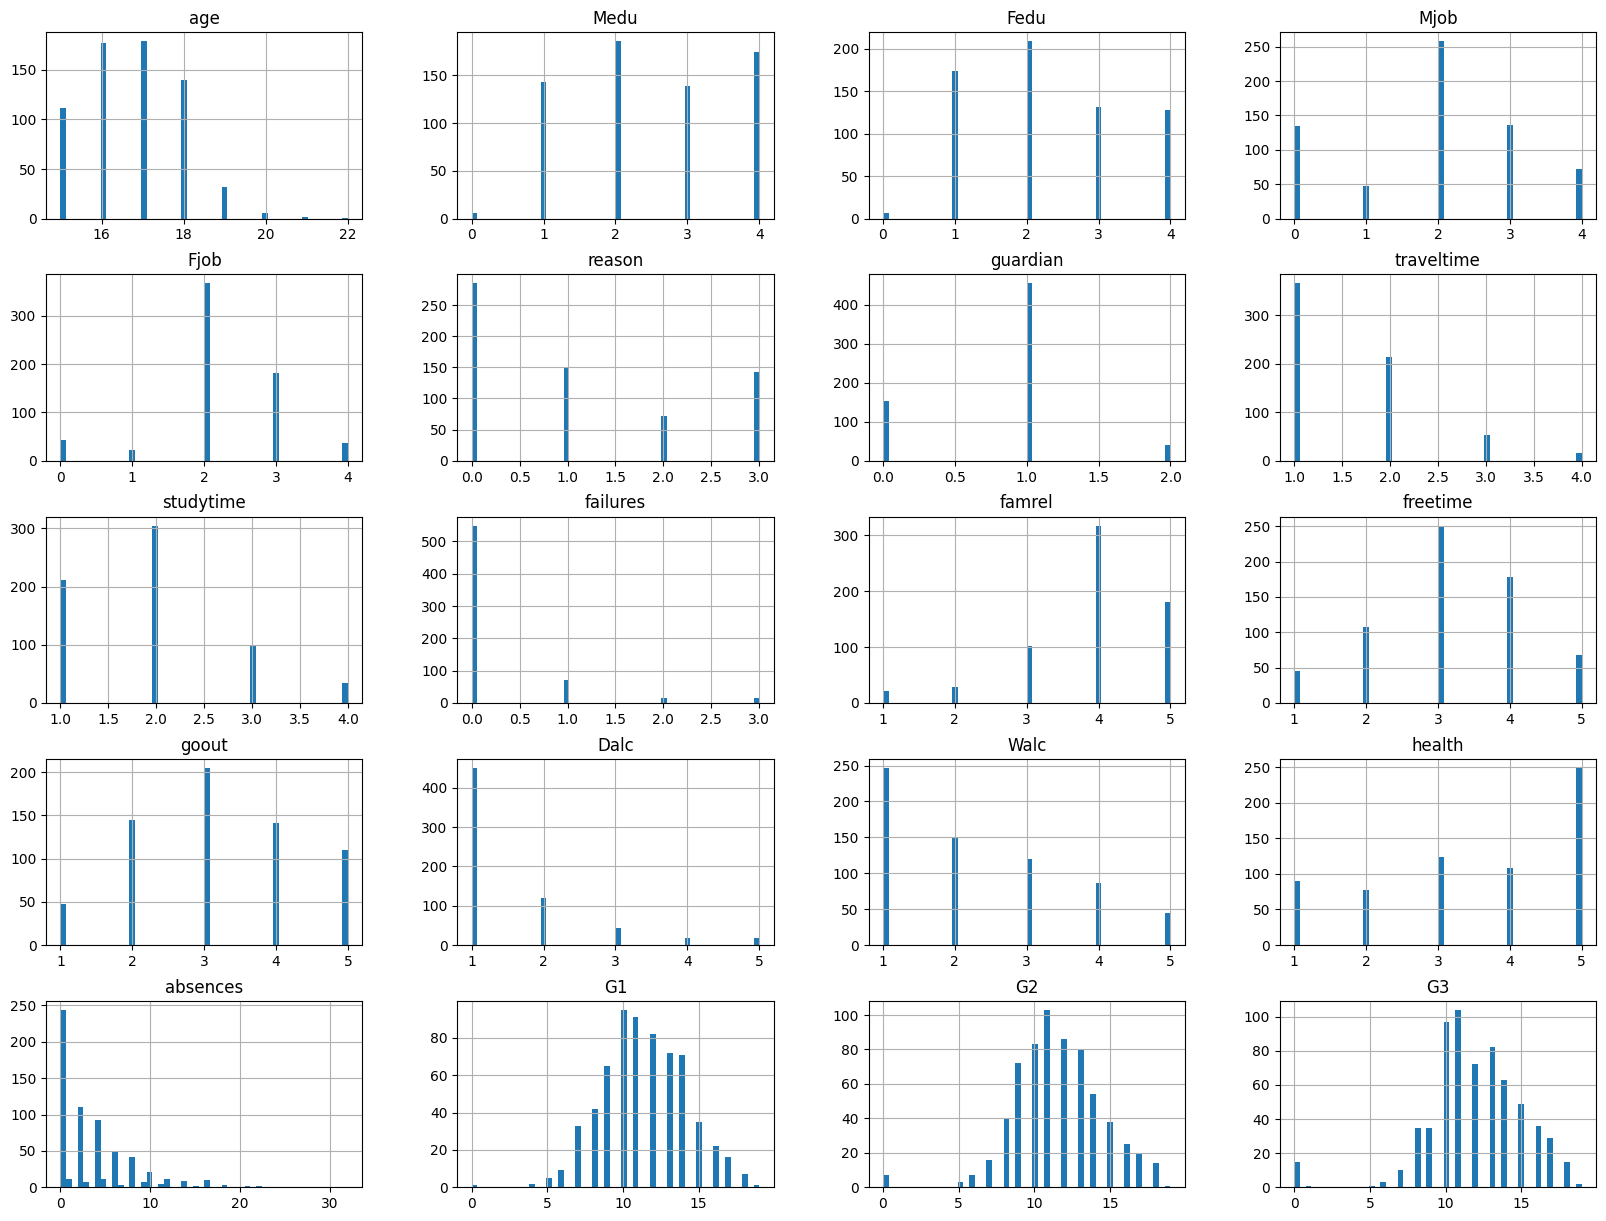

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import  scatter_matrix
df_encoded.hist(bins=50,figsize=(20,15))
plt.show()

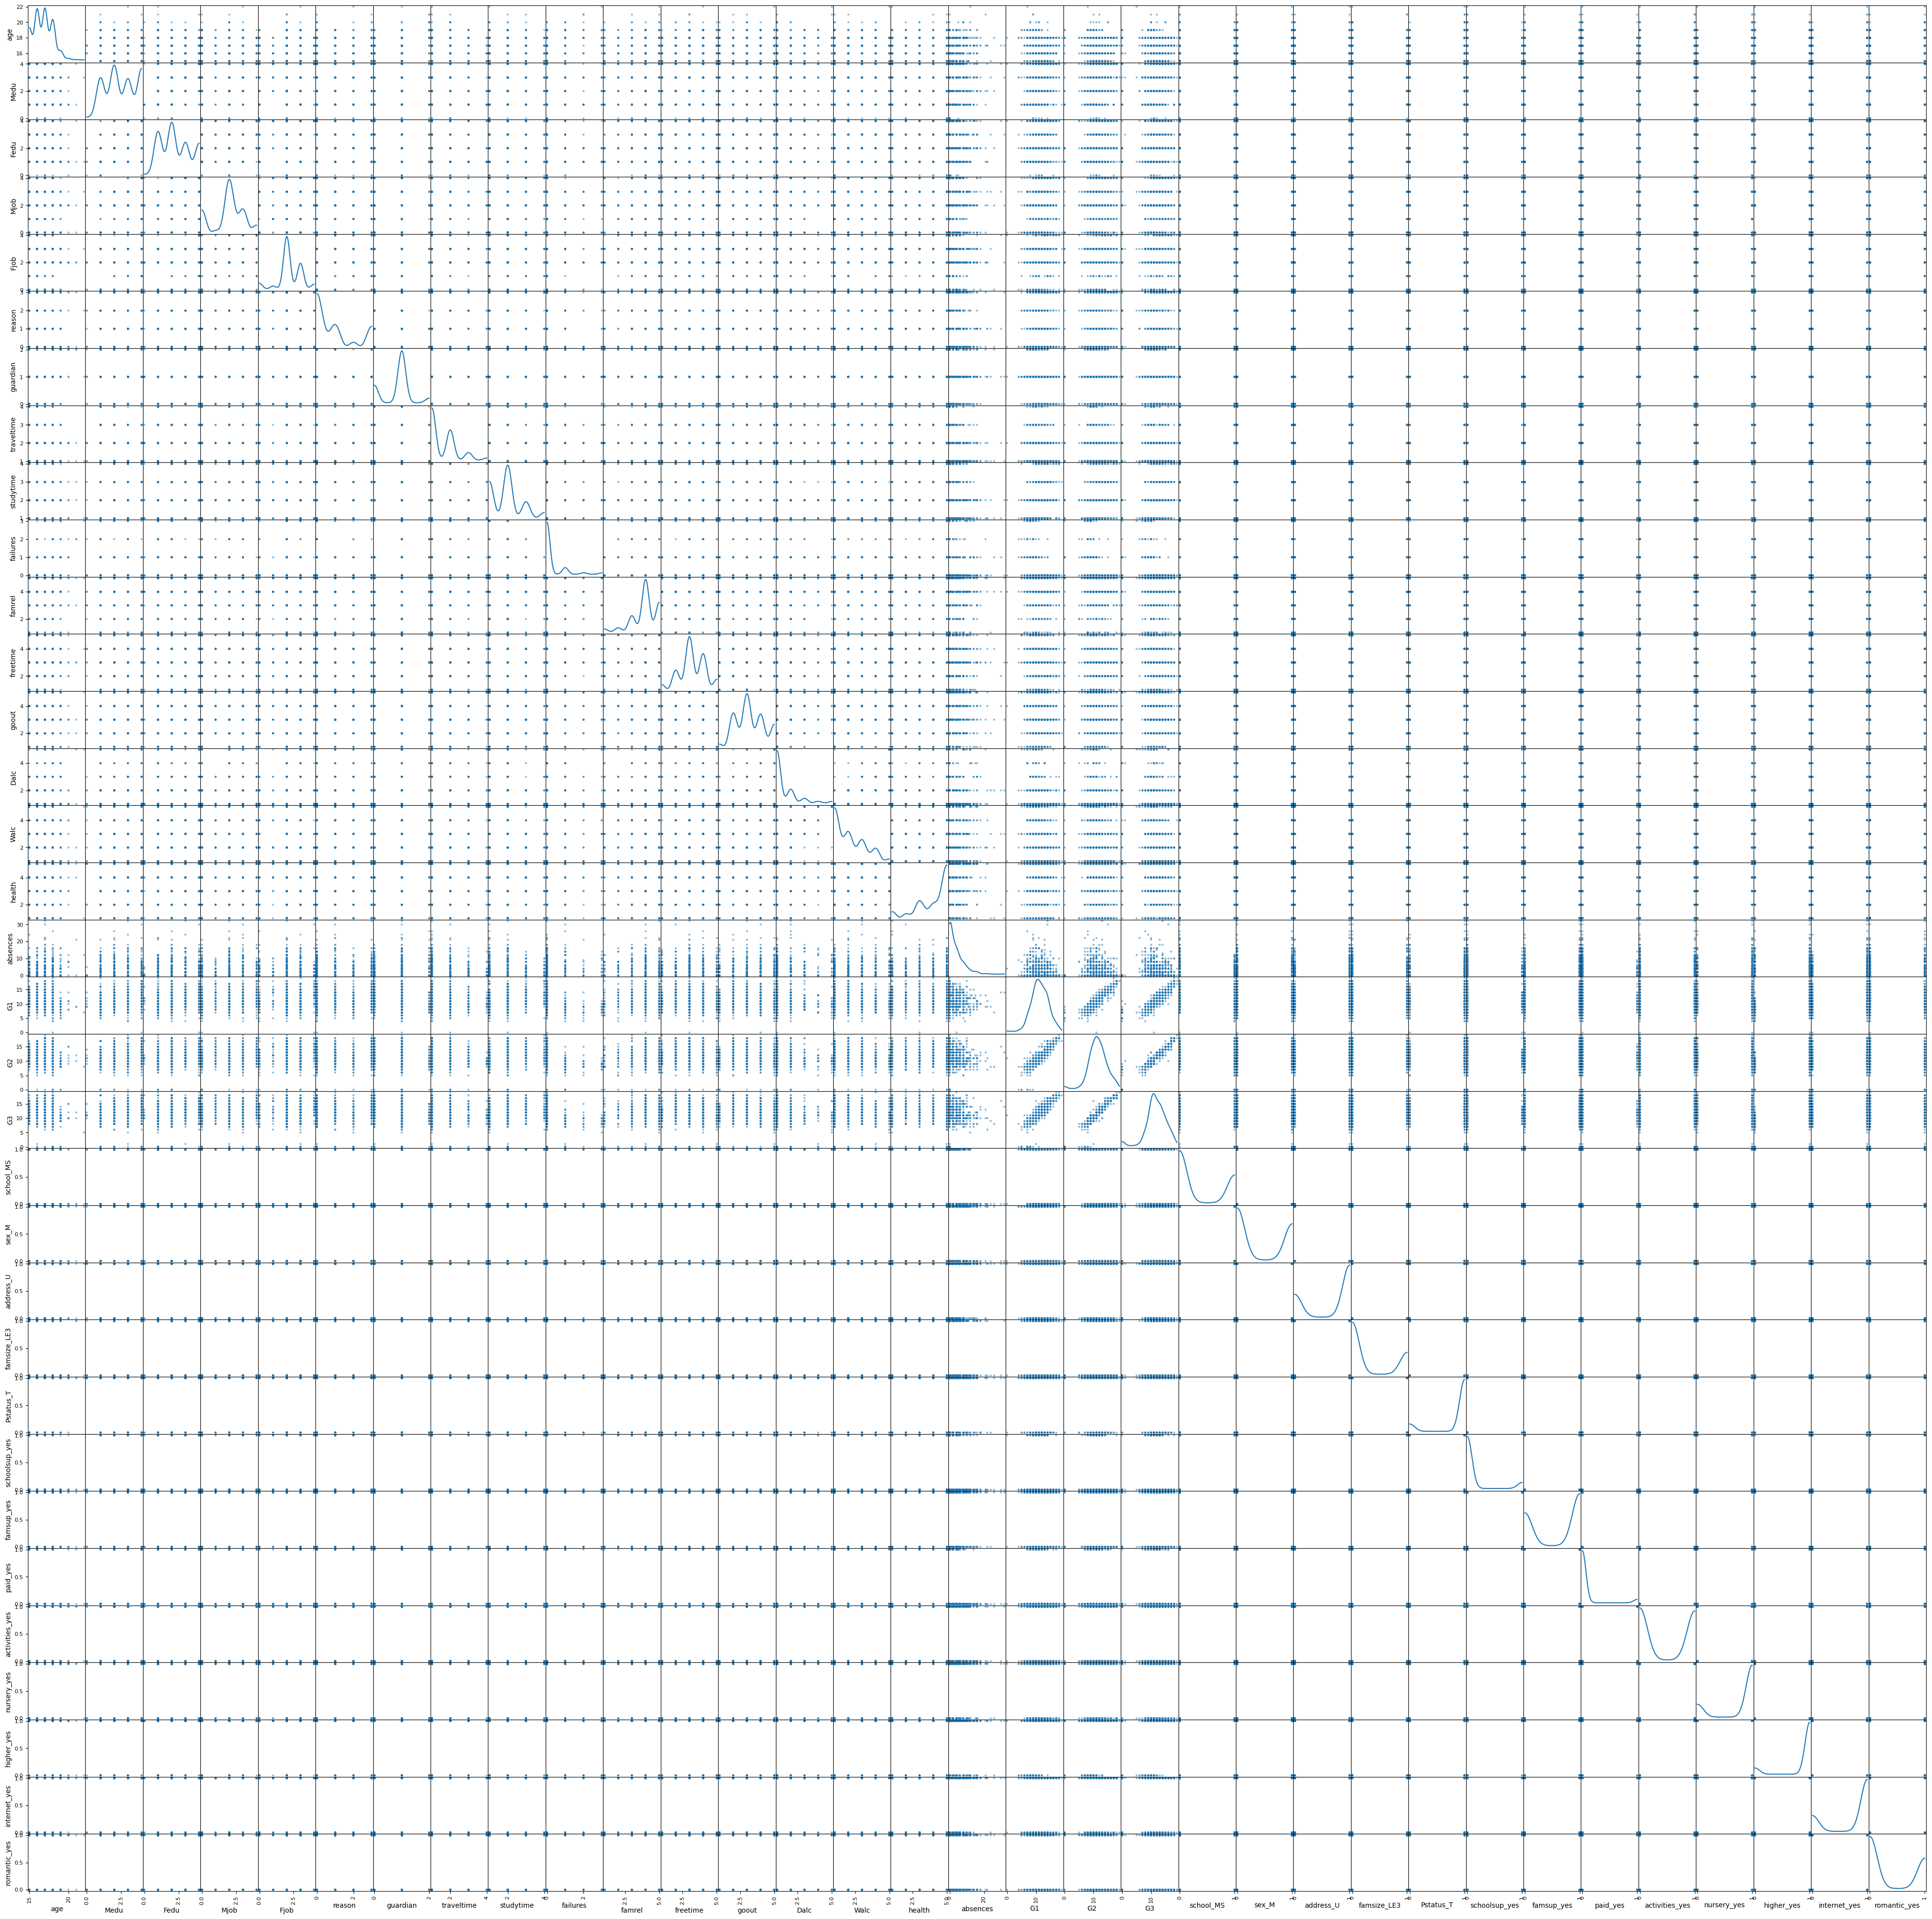

In [10]:
df_encoded_num=df_encoded.astype(int)
scatter_matrix(df_encoded_num, alpha=0.5, figsize=(50, 50), diagonal='kde')
plt.show()

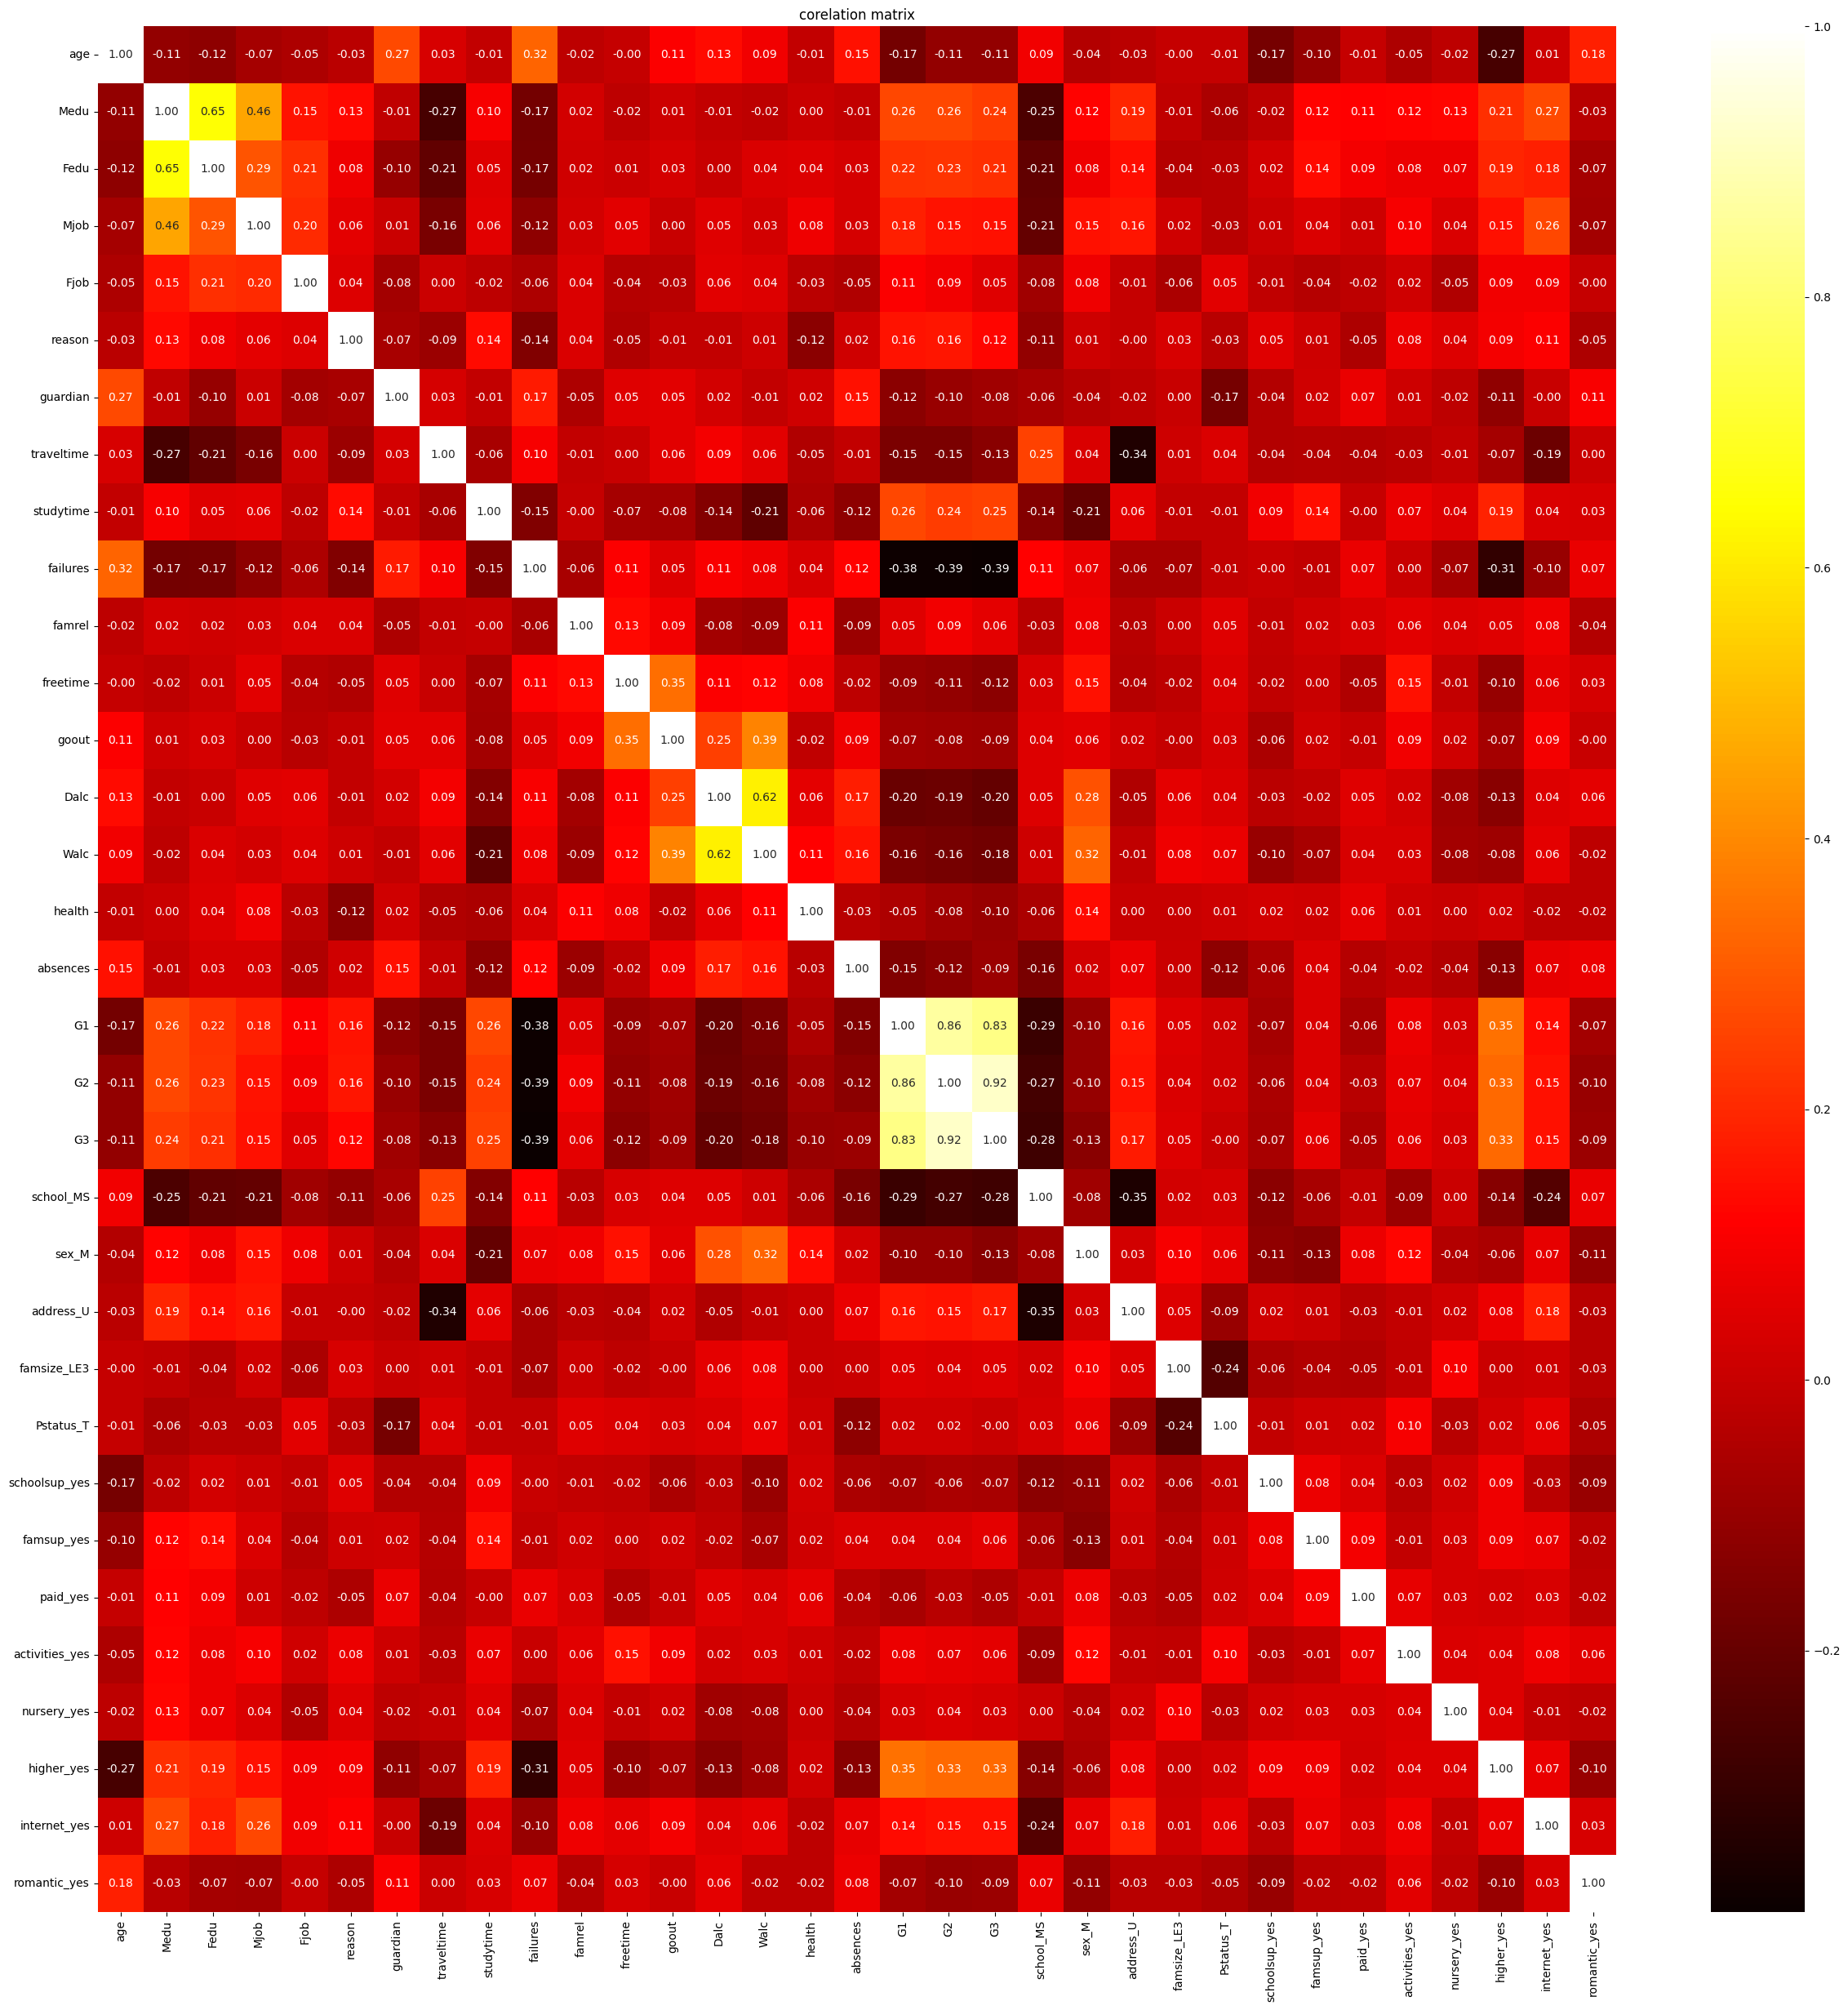

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm=df_encoded.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,cmap='hot',fmt='.2f')
plt.title('corelation matrix')
plt.show()

g1+g2+higher+medu+fedu+studytime+failures+dalc+walc+sex+school+address+internet

In [12]:
from inspect import getcoroutinelocals
df_cleaned=df_encoded.drop(['age','Mjob','Fjob','absences','romantic_yes','nursery_yes','reason','guardian','famrel','goout','health','school_MS','famsize_LE3','Pstatus_T','freetime','paid_yes'],axis=1)

In [13]:
df_encoded.info()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             649 non-null    int64
 1   Medu            649 non-null    int64
 2   Fedu            649 non-null    int64
 3   Mjob            649 non-null    int64
 4   Fjob            649 non-null    int64
 5   reason          649 non-null    int64
 6   guardian        649 non-null    int64
 7   traveltime      649 non-null    int64
 8   studytime       649 non-null    int64
 9   failures        649 non-null    int64
 10  famrel          649 non-null    int64
 11  freetime        649 non-null    int64
 12  goout           649 non-null    int64
 13  Dalc            649 non-null    int64
 14  Walc            649 non-null    int64
 15  health          649 non-null    int64
 16  absences        649 non-null    int64
 17  G1              649 non-null    int64
 18  G2              649 non-null  

In [14]:
import numpy as np
df_encoded['Attendance_Ratio']=1-df_encoded['absences']/93
df_encoded['average_grade']=(df.G1+df.G2+df.G3)/3
df_encoded['good_care']=np.where((df_encoded['famrel']+df_encoded['goout']+df_encoded['health']) >10 ,1 , 0)
df_encoded['alcahol_addict']=np.where((df_encoded['Walc']+df_encoded['Dalc'])>7,1,0)
df_encoded['fail_risk']=np.where(df_encoded['G3']<10,'high',np.where(df_encoded['G3']<14,'medium','low'))
df_encoded.head()

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,...,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Attendance_Ratio,average_grade,good_care,alcahol_addict,fail_risk
0,18,4,4,0,4,0,1,2,2,0,...,False,True,True,False,False,0.956989,7.333333,1,0,medium
1,17,1,1,0,2,0,0,1,2,0,...,False,False,True,True,False,0.978495,10.333333,1,0,medium
2,15,1,1,0,2,2,1,1,2,0,...,False,True,True,True,False,0.935484,12.333333,0,0,medium
3,15,4,2,1,3,1,1,1,3,0,...,True,True,True,True,True,1.000000,14.000000,0,0,low
4,16,3,3,2,2,1,0,1,2,0,...,False,True,True,False,False,1.000000,12.333333,1,0,medium


In [15]:
df_cleaned['good_care']=np.where((df_encoded['famrel']+df_encoded['goout']+df_encoded['health']) >10 ,1 , 0)
df_cleaned['alcahol_addict']=np.where((df_encoded['Walc']+df_encoded['Dalc'])>7,1,0)
df_cleaned['fail_risk']=np.where(df_encoded['G3']<10,'high',np.where(df_encoded['G3']<14,'medium','low'))

In [16]:
from sklearn.model_selection import train_test_split , KFold
x=df_cleaned.drop(['G3','fail_risk'],axis=1)
y=df_encoded['fail_risk']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

In [21]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(x_train,y_train)
y_pred_svm=model_svm.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import numpy as np
names=np.array(['Lgistic regression','decision Tree','Random Forest','SVM'])
model =np.array([y_pred_lr,y_pred_dt,y_pred_rf,y_pred_svm])
for y_pred,i in zip(model,names) :
      print(f'{i} metric is :')
      print('\naccuracy_score is ',accuracy_score(y_test,y_pred))
      print('\nprecision_score is ',precision_score(y_test,y_pred ,average='weighted'))
      print('\nrecall_score is ',recall_score(y_test,y_pred,average='weighted'))
      print('\nf1_score is ',f1_score(y_test,y_pred,average='weighted'))
      print('\nconfusion_matrix is \n',confusion_matrix(y_test,y_pred),'\n\n\n')


Lgistic regression metric is :

accuracy_score is  0.8

precision_score is  0.8192219679633868

recall_score is  0.8

f1_score is  0.8043480652851641

confusion_matrix is 
 [[13  0  2]
 [ 0 34 10]
 [10  4 57]] 



decision Tree metric is :

accuracy_score is  0.676923076923077

precision_score is  0.7231754240157603

recall_score is  0.676923076923077

f1_score is  0.6817068706016353

confusion_matrix is 
 [[12  0  3]
 [ 0 36  8]
 [18 13 40]] 



Random Forest metric is :

accuracy_score is  0.8307692307692308

precision_score is  0.8488366548705533

recall_score is  0.8307692307692308

f1_score is  0.832314826471946

confusion_matrix is 
 [[13  0  2]
 [ 0 41  3]
 [ 8  9 54]] 



SVM metric is :

accuracy_score is  0.8461538461538461

precision_score is  0.8639257294429709

recall_score is  0.8461538461538461

f1_score is  0.8409764918625678

confusion_matrix is 
 [[ 8  0  7]
 [ 0 33 11]
 [ 2  0 69]] 





here we see that decision tree get the worst metrics and thatr return to the high number of classes
in other hand we get svm and random forest get a better score and that reffer to their comptablty with this kind of data

In [24]:
df_n=pd.read_excel('/content/finalDataset0.2.xlsx')
print(df_n.head())

   teaching                                         teaching.1  coursecontent  \
0         0  teacher are punctual but they should also give...            0.0   
1         1                                              Good            -1.0   
2         1  Excellent lectures are delivered by teachers a...            1.0   
3         1                                               Good           -1.0   
4         1  teachers give us all the information required ...            1.0   

                                     coursecontent.1  examination  \
0                     content of courses are average          1.0   
1                                           Not good          1.0   
2  All courses material provide very good knowled...          1.0   
3  Content of course is perfectly in line with th...         -1.0   
4           content of courses improves my knowledge          1.0   

                                         Examination  labwork  \
0                        examinat

In [25]:
df_n=df_n[['coursecontent','coursecontent.1']]
print(df_n.head())
df_n.info()

   coursecontent                                    coursecontent.1
0            0.0                     content of courses are average
1           -1.0                                           Not good
2            1.0  All courses material provide very good knowled...
3           -1.0  Content of course is perfectly in line with th...
4            1.0           content of courses improves my knowledge
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   coursecontent    184 non-null    float64
 1   coursecontent.1  185 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [26]:
df_n.isnull().sum()
df_n.dropna(inplace=True)

In [27]:
import regex as re
import string

def clean_text(text):
    text = str(text).lower()  # Ensure text is a string and convert to lowercase
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text

df_n['coursecontent.1'] = df_n['coursecontent.1'].apply(clean_text)
print(df_n.head())

   coursecontent                                    coursecontent.1
0            0.0                     content of courses are average
1           -1.0                                           not good
2            1.0  all courses material provide very good knowled...
3           -1.0  content of course is perfectly in line with th...
4            1.0           content of courses improves my knowledge


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=300 , oov_token='<oov>')
tokenizer.fit_on_texts(df_n['coursecontent.1'])
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(df_n['coursecontent.1'])
padded_sequences=pad_sequences(sequences,maxlen=15,padding='post' ,truncating='post')
print(f'word indexing \n{word_index}\n')
print(f'sequences are \n{sequences}\n')
print(f'padded sequences are \n{padded_sequences}\n')

word indexing 
{'<oov>': 1, 'good': 2, 'is': 3, 'the': 4, 'of': 5, 'course': 6, 'are': 7, 'and': 8, 'content': 9, 'courses': 10, 'not': 11, 'very': 12, 'in': 13, 'depth': 14, 'to': 15, 'material': 16, 'knowledge': 17, 'some': 18, 'but': 19, 'it': 20, 'proper': 21, 'for': 22, 'more': 23, 'be': 24, 'every': 25, 'subjects': 26, 'that': 27, 'its': 28, 'knowledgeable': 29, 'on': 30, 'should': 31, 'excellent': 32, 'with': 33, 'enough': 34, 'us': 35, 'university': 36, 'teachers': 37, 'there': 38, 'a': 39, 'subject': 40, 'we': 41, 'syllabus': 42, 'less': 43, 'this': 44, 'provided': 45, 'only': 46, 'thing': 47, 'books': 48, 'by': 49, 'much': 50, 'time': 51, 'deep': 52, 'have': 53, 'like': 54, 'also': 55, 'average': 56, 'all': 57, 'provide': 58, 'my': 59, 'improvement': 60, 'upto': 61, 'mark': 62, 'required': 63, 'available': 64, 'they': 65, 'appropriate': 66, 'well': 67, 'helpful': 68, 'one': 69, 'so': 70, 'teaching': 71, 'needs': 72, 'need': 73, 'from': 74, 'based': 75, 'fine': 76, 'students':

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

max_words = 300  # Based on your Tokenizer num_words
max_len = 15 # Based on your pad_sequences maxlen

model = Sequential([
    Embedding(max_words, 8, input_length=max_len),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid') # Assuming binary sentiment classification (e.g., positive/negative)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming 'padded_sequences' are your features (X) and 'df_n['coursecontent']' are your labels (y)
X = padded_sequences
y = df_n['coursecontent']

# Convert labels to appropriate type for binary classification if necessary
# If 'coursecontent' has values like 1.0 and -1.0, you might need to map them to 1 and 0
y = y.apply(lambda x: 1 if x > 0 else 0) # Example mapping positive to 1 and non-positive to 0


model.fit(X, y, epochs=10, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4232 - loss: 0.6965 - val_accuracy: 0.5946 - val_loss: 0.6926
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7501 - loss: 0.6844 - val_accuracy: 0.5946 - val_loss: 0.6876
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7519 - loss: 0.6769 - val_accuracy: 0.6216 - val_loss: 0.6836
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7483 - loss: 0.6692 - val_accuracy: 0.6216 - val_loss: 0.6786
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7713 - loss: 0.6573 - val_accuracy: 0.6216 - val_loss: 0.6697
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8061 - loss: 0.6331 - val_accuracy: 0.6216 - val_loss: 0.6577
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7483 - loss: 0.6229 - val_accuracy: 0.6216 - val_loss: 0.6444
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7618 - loss: 0.5884 - val_accuracy: 0.6216 - val_loss: 0.6298


In [30]:
model = Sequential([
    Embedding(max_words, 8, input_length=max_len),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=20)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6377 - loss: 0.6929
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8002 - loss: 0.6882 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8323 - loss: 0.6847 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8335 - loss: 0.6802 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8465 - loss: 0.6748 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8518 - loss: 0.6677 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8653 - loss: 0.6587 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8699 - loss: 0.6487 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8850 - loss: 0.6336 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8801 - loss: 0.6140 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8699 - loss: 0.5997 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8856 - loss: 0.5666 
Ep